# Estatística e Visualização.

### 1 - Vamos importar os pacotes Pandas e Numpy.

In [1]:
import numpy as np
import pandas as pd

#### Vamos ler um dataset que trata da população de Linces (Lynxes), lebres (hares) e cenouras (carrots) e ver as populações de cada elemento, por ano.

In [18]:
data = pd.read_csv('populations.txt', 
                   sep = '\t'
                  )
data

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


#### Vamos passar todas as colunas a arranjos Numpy.

In [19]:
#type(year)
year = data["# year"].values
year

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920])

In [20]:
hares = data["hare"].values
hares

array([30000., 47200., 70200., 77400., 36300., 20600., 18100., 21400.,
       22000., 25400., 27100., 40300., 57000., 76600., 52300., 19500.,
       11200.,  7600., 14600., 16200., 24700.])

In [21]:
lynxes = data["lynx"].values 
lynxes

array([ 4000.,  6100.,  9800., 35200., 59400., 41700., 19000., 13000.,
        8300.,  9100.,  7400.,  8000., 12300., 19500., 45700., 51100.,
       29700., 15800.,  9700., 10100.,  8600.])

In [22]:
carrots = data["carrot"].values 
carrots

array([48300, 48200, 41500, 38200, 40600, 39800, 38600, 42300, 44500,
       42100, 46000, 46800, 43800, 40900, 39400, 39000, 36700, 41800,
       43300, 41300, 47300])

#### Podemos ver como essas populações variam com o tempo, importando o pacote matplotlib e usando a função [`plt.plot`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html). Podemos customizar o gráfico com a função [`plt.legend`](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html).

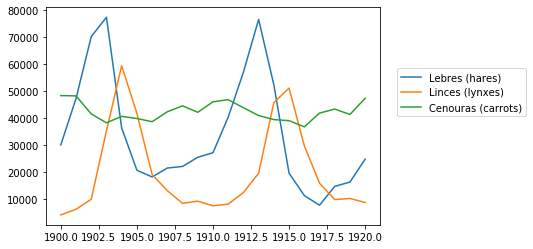

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Lebres (hares)', 'Linces (lynxes)', 'Cenouras (carrots)'), loc = (1.05, 0.5)) 
plt.show()

#### Veja como a população de cenouras vem se mantendo estável, ao longo dos mais de cem anos de histórico e como a população de lebres se mantem limitada por aquela dos linces, em um tipo de mecanismo de controle. 

### 2 - Estatística descritiva.

#### Para cada variável da série histórica, calculamos a média e o desvio padrão. Arredondando os valores, para que tenham somente 2 decimais. 

#### Com o método [`.iloc[]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas-dataframe-iloc), podemos fazer slicing de um dataframe de pandas, com as mesmas regras de slicing que usamos nos arrays de Numpy. Destacamos a coluna de anos e obter um arranjo, usando a propriedade "values".

#### Ao fim, vemos uma amostra das cinco primeiras linhas.

In [24]:
populações = data.iloc[:, 1:].values
#populações
populações[0:5, :]

array([[30000.,  4000., 48300.],
       [47200.,  6100., 48200.],
       [70200.,  9800., 41500.],
       [77400., 35200., 38200.],
       [36300., 59400., 40600.]])

#### As funções [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) e [`np.std()`](https://numpy.org/doc/1.18/reference/generated/numpy.std.html) recebem [`axis = 0`](https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean) como parâmetro. Em cada caso o eixo de linhas é recolhido, ficando com uma única linha com a média e o desvio padrão de cada coluna, respectivamente.

In [25]:
print (" Coelhos, Linces, Cenouras")
print ("Mean:", np.around(populações.mean(axis = 0), 
                          decimals = 2
                         )
      )

print ("Std:", np.around(populações.std(axis = 0), 
                         decimals = 2
                        )
      )

 Coelhos, Linces, Cenouras
Mean: [34080.95 20166.67 42400.  ]
Std: [20897.91 16254.59  3322.51]


#### Em seguida, para cada espécie, calcular o ano em que tiveram maior população. Vamos identificar os valores máximos que são vistos no gráfico:

In [26]:
j_max_years = np.argmax(populações, axis = 0)
#j_max_years
print (" Coelhos, Linces, Cenouras")
print ("Anos de população máxima:", year[j_max_years])

 Coelhos, Linces, Cenouras
Anos de população máxima: [1903 1904 1900]


#### O método [`np.argmax()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html) retorna os índices de linhas onde estão os valores máximos de cada coluna (lembrar que axis = 0 reduz a dimensão das linhas). Note que usamos Fancy Indexing.

#### De maneira semelhante, podemos ver as espécies com a maior população em cada ano:

In [11]:
max_species = np.argmax(populações, axis = 1)
#max_species
species = np.array(['Coelhos', 'Linces', 'Cenouras'])


# Combinar os dois vetores em um array de mais uma dimensão.
resultado = np.array([year, species[max_species]])
#resultado = np.array([year, max_species])
print ("Espécies com população máxima:")
print (resultado)

Espécies com população máxima:
[['1900' '1901' '1902' '1903' '1904' '1905' '1906' '1907' '1908' '1909'
  '1910' '1911' '1912' '1913' '1914' '1915' '1916' '1917' '1918' '1919'
  '1920']
 ['Cenouras' 'Cenouras' 'Coelhos' 'Coelhos' 'Linces' 'Linces' 'Cenouras'
  'Cenouras' 'Cenouras' 'Cenouras' 'Cenouras' 'Cenouras' 'Coelhos'
  'Coelhos' 'Coelhos' 'Linces' 'Cenouras' 'Cenouras' 'Cenouras'
  'Cenouras' 'Cenouras']]


#### Ao receber eixo `axis = 1`, o eixo das colunas é reduzido. Isso significa que é calculado o máximo para cada linha.

#### Em seguida, queremos ver em que anos algumas das populações estão acima de 50000.

In [12]:
maiores_50000 = np.any(populações > 50000, axis = 1)
print ("Alguma população é maior que 50000:", year[maiores_50000])

Alguma população é maior que 50000: [1902 1903 1904 1912 1913 1914 1915]


#### A função de redução de dimensões [np.any](https://docs.scipy.org/doc/numpy/reference/generated/numpy.any.html?highlight=numpy%20any#numpy-any) reduz o eixo das colunas indicando, para cada linha, se algum dos elementos das colunas atende à condição de ser maior que 50000


#### Também podemos consultar em quais biênios, cada espécie teve seus menores níveis populacionais. Primeiro, selecionamos os dois primeiros índices ordenando por coluna, usando a função [np.argsort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html?highlight=numpy%20argsort#numpy-argsort).

In [13]:
j_top_2 = np.argsort(populações, axis = 0)[:2]
#j_top_2
print ("Dois anos de população mais baixa por espécie:")
print(['Coelhos', 'Linces', 'Cenouras'])
print (year[j_top_2])

Dois anos de população mais baixa por espécie:
['Coelhos', 'Linces', 'Cenouras']
[[1917 1900 1916]
 [1916 1901 1903]]


#### Também podemos analisar a matriz de covariâncias entre as diferentes espécies:

In [14]:
np.cov([hares, lynxes, carrots])

array([[ 4.58558619e+08,  2.56418333e+07, -1.21050000e+06],
       [ 2.56418333e+07,  2.77422333e+08, -3.85930000e+07],
       [-1.21050000e+06, -3.85930000e+07,  1.15910000e+07]])

* Posso comparar as diferentes covariâncias? Por quê?
* Qual variável tem a maior variância? Como isso é visto no gráfico?
* O que significa uma covariância positiva? E uma negativa?

#### A função [`np.corrcoef()`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) retorna a os [coeficientes de correlação do produto-momento de Pearson](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) dos dados.

In [15]:
np.corrcoef([hares, lynxes, carrots])

array([[ 1.        ,  0.07189206, -0.01660378],
       [ 0.07189206,  1.        , -0.68057717],
       [-0.01660378, -0.68057717,  1.        ]])

* Como é o sinal da correlação em relação ao sinal da covariância?
* Em quais unidades físicas está a correlação? E a covariância?
* Quais são as espécies que estão mais correlacionadas? Como isso é visto no gráfico?

In [16]:
np.corrcoef([hares, lynxes, carrots])

array([[ 1.        ,  0.07189206, -0.01660378],
       [ 0.07189206,  1.        , -0.68057717],
       [-0.01660378, -0.68057717,  1.        ]])

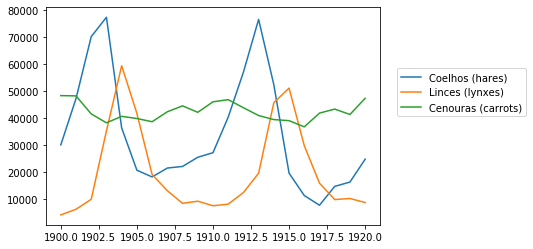

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Coelhos (hares)', 'Linces (lynxes)', 'Cenouras (carrots)'), loc = (1.05, 0.5)) 
plt.show()